In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Read datasets

In [3]:
sleep = pd.read_csv("/Users/chun/Galvanize/capstones/capstone1-time-spleeping-cancer-correlation/data/time-spent-sleeping-per-day-men-vs-women.csv")
cases = pd.read_csv("/Users/chun/Galvanize/capstones/capstone1-time-spleeping-cancer-correlation/data/CI5-XI/cases.csv")
pop = pd.read_csv("/Users/chun/Galvanize/capstones/capstone1-time-spleeping-cancer-correlation/data/CI5-XI/pop.csv")
registry = pd.read_csv("/Users/chun/Galvanize/capstones/capstone1-time-spleeping-cancer-correlation/data/CI5-XI/registry.txt",delimiter = "\t",encoding='latin-1',header=None)
cancer_summary = pd.read_csv("/Users/chun/Galvanize/capstones/capstone1-time-spleeping-cancer-correlation/data/CI5-XI/cancer_summary.txt",delimiter = "\t",encoding='latin-1')

### Sleep Data

In [8]:
sleep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46934 entries, 0 to 46933
Data columns (total 7 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Entity                                     46934 non-null  object 
 1   Code                                       46132 non-null  object 
 2   Year                                       46934 non-null  int64  
 3   Total population (Gapminder, HYDE & UN)    46883 non-null  float64
 4   Continent                                  285 non-null    object 
 5   Sleep, women (European Commission (2004))  10 non-null     float64
 6   Sleep, men (European Commission (2004))    10 non-null     float64
dtypes: float64(3), int64(1), object(3)
memory usage: 2.5+ MB


In [53]:
sleep.head()

,Entity,Code,Year,"Total population (Gapminder, HYDE & UN)",Continent,"Sleep, women (European Commission (2004))","Sleep, men (European Commission (2004))"
0,Abkhazia,OWID_ABK,2015,NaN,Asia,NaN,NaN
1,Afghanistan,AFG,1800,3280000.0,NaN,NaN,NaN
2,Afghanistan,AFG,1801,3280000.0,NaN,NaN,NaN
3,Afghanistan,AFG,1802,3280000.0,NaN,NaN,NaN
4,Afghanistan,AFG,1803,3280000.0,NaN,NaN,NaN


In [31]:
sleep[sleep['Sleep, women (European Commission (2004))'].notnull()]

,Entity,Code,Year,"Total population (Gapminder, HYDE & UN)",Continent,"Sleep, women (European Commission (2004))","Sleep, men (European Commission (2004))"
4182,Belgium,BEL,2002,10365000.0,NaN,509.00000,495.00000
13259,Estonia,EST,2002,1383000.0,NaN,515.00000,512.00000
14401,Finland,FIN,2002,5213000.0,NaN,512.35577,502.00000
14621,France,FRA,2002,59803000.0,NaN,535.00000,525.00000
15642,Germany,DEU,2002,81535000.0,NaN,499.00000,491.65857
18347,Hungary,HUN,2002,10167000.0,NaN,522.36273,511.35507
31039,Norway,NOR,2002,4546000.0,NaN,489.65994,477.00000
38038,Slovenia,SVN,2002,1987000.0,NaN,504.35022,497.34534
40242,Sweden,SWE,2002,8921000.0,NaN,491.34119,481.00000
44346,United Kingdom,GBR,2002,59326000.0,NaN,506.64816,498.69263


### Beer Consumption

In [4]:
beer = pd.read_csv("/Users/chun/Galvanize/capstones/capstone1-time-spleeping-cancer-correlation/data/beer-consumption-per-person.csv")

In [5]:
beer.columns = ['Entity','Code','Year','Consumption']

In [60]:
beer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8952 entries, 0 to 8951
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Entity       8952 non-null   object 
 1   Code         8952 non-null   object 
 2   Year         8952 non-null   int64  
 3   Consumption  8952 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 279.9+ KB


In [61]:
beer.head()

,Entity,Code,Year,Consumption
0,Afghanistan,AFG,1961,0.0
1,Afghanistan,AFG,1962,0.0
2,Afghanistan,AFG,1963,0.0
3,Afghanistan,AFG,1964,0.0
4,Afghanistan,AFG,1965,0.0


In [81]:
beer.Entity.value_counts()

Singapore         55
United States     55
United Kingdom    55
Norway            55
Austria           55
                  ..
Andorra           14
Nauru             12
Maldives          12
Estonia            9
Montenegro         6
Name: Entity, Length: 189, dtype: int64

In [64]:
beer.describe()

,Year,Consumption
count,8952.000000,8952.000000
mean,1988.267985,1.685124
std,15.276194,1.961233
min,1960.000000,0.000000
25%,1975.000000,0.250000
50%,1989.000000,0.910000
75%,2002.000000,2.450000
max,2015.000000,10.210000


In [18]:
US = beer[beer['Entity'] == 'United States']
Canada = beer[beer['Entity'] == 'Canada']
UK = beer[beer['Entity'] == 'United Kingdom']
France = beer[beer['Entity'] == 'France']
Italy = beer[beer['Entity'] == 'Italy']
Russia = beer[beer['Entity'] == 'Russia']
Poland = beer[beer['Entity'] == 'Poland']
China = beer[beer['Entity'] == 'China']
Japan = beer[beer['Entity'] == 'Japan']
India = beer[beer['Entity'] == 'India']
Nigeria = beer[beer['Entity'] == 'Nigeria']

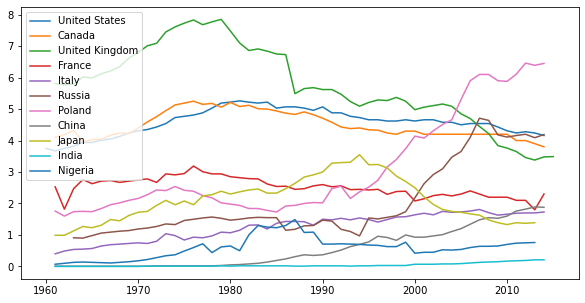

In [19]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(US['Year'],US['Consumption'],label = 'United States')
ax.plot(Canada['Year'],Canada['Consumption'],label = 'Canada')
ax.plot(UK['Year'],UK['Consumption'],label = 'United Kingdom')
ax.plot(France['Year'],France['Consumption'],label = 'France')
ax.plot(Italy['Year'],Italy['Consumption'],label = 'Italy')
ax.plot(Russia['Year'],Russia['Consumption'],label = 'Russia')
ax.plot(Poland['Year'],Poland['Consumption'],label = 'Poland')
ax.plot(China['Year'],China['Consumption'],label = 'China')
ax.plot(Japan['Year'],Japan['Consumption'],label = 'Japan')
ax.plot(India['Year'],India['Consumption'],label = 'India')
ax.plot(Nigeria['Year'],Nigeria['Consumption'],label = 'Nigeria')
#ax.set_title('Number of Tweets by Day')
#ax.set_xlabel('Date')
#ax.set_ylabel('Number of Tweets')
ax.legend()

### Cases Data

In [51]:
cases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58590 entries, 0 to 58589
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   REGISTRY  58590 non-null  int64
 1   SEX       58590 non-null  int64
 2   CANCER    58590 non-null  int64
 3   TOTAL     58590 non-null  int64
 4   N0_4      58590 non-null  int64
 5   N5_9      58590 non-null  int64
 6   N10_14    58590 non-null  int64
 7   N15_19    58590 non-null  int64
 8   N20_24    58590 non-null  int64
 9   N25_29    58590 non-null  int64
 10  N30_34    58590 non-null  int64
 11  N35_39    58590 non-null  int64
 12  N40_44    58590 non-null  int64
 13  N45_49    58590 non-null  int64
 14  N50_54    58590 non-null  int64
 15  N55_59    58590 non-null  int64
 16  N60_64    58590 non-null  int64
 17  N65_69    58590 non-null  int64
 18  N70_74    58590 non-null  int64
 19  N75_79    58590 non-null  int64
 20  N80_84    58590 non-null  int64
 21  N85       58590 non-null  int64
 22

In [54]:
cases.head()

,REGISTRY,SEX,CANCER,TOTAL,N0_4,N5_9,N10_14,N15_19,N20_24,N25_29,...,N45_49,N50_54,N55_59,N60_64,N65_69,N70_74,N75_79,N80_84,N85,N_unk
0,101200199,1,1,19,0,0,0,1,0,1,...,2,0,2,3,2,2,1,0,1,0
1,101200199,1,2,3,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
2,101200199,1,3,7,0,0,0,0,0,1,...,0,1,0,0,0,2,0,1,0,0
3,101200199,1,4,3,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,101200199,1,5,6,0,0,0,0,0,0,...,0,1,0,0,0,1,1,2,0,0


In [14]:
cases['N0_14'] = cases['N0_4'] + cases['N5_9'] + cases['N10_14']
cases['N15_29'] = cases['N15_19'] + cases['N20_24'] + cases['N25_29']
cases['N30_44'] = cases['N30_34'] + cases['N35_39'] + cases['N40_44']
cases['N45_64'] = cases['N45_49'] + cases['N50_54'] + cases['N55_59'] + cases['N60_64']
cases['N65'] = cases['N65_69'] + cases['N70_74'] +  cases['N75_79'] +  cases['N80_84'] +  cases['N85']

In [15]:
cases.drop(['N0_4','N5_9','N10_14','N15_19','N20_24','N25_29','N30_34','N35_39','N40_44','N45_49','N50_54','N55_59','N60_64','N65_69','N70_74','N75_79','N80_84','N85','N_unk'],axis = 1, inplace = True)

In [16]:
cases.head()

,REGISTRY,SEX,CANCER,TOTAL,N0_14,N15_29,N30_44,N45_64,N65
0,101200199,1,1,19,0,2,4,7,6
1,101200199,1,2,3,0,0,1,1,1
2,101200199,1,3,7,0,1,2,1,3
3,101200199,1,4,3,0,0,2,1,0
4,101200199,1,5,6,0,0,1,1,4


In [17]:
cases.to_csv(r'/Users/chun/Galvanize/capstones/capstone1-time-spleeping-cancer-correlation/data/clean_cases.csv',index = False, header = True)

### Population Data

In [52]:
pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 930 entries, 0 to 929
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   REGISTRY    930 non-null    int64
 1   SEX         930 non-null    int64
 2   AGE_GROUPS  930 non-null    int64
 3   P0_4        930 non-null    int64
 4   P5_9        930 non-null    int64
 5   P10_14      930 non-null    int64
 6   P15_19      930 non-null    int64
 7   P20_24      930 non-null    int64
 8   P25_29      930 non-null    int64
 9   P30_34      930 non-null    int64
 10  P35_39      930 non-null    int64
 11  P40_44      930 non-null    int64
 12  P45_49      930 non-null    int64
 13  P50_54      930 non-null    int64
 14  P55_59      930 non-null    int64
 15  P60_64      930 non-null    int64
 16  P65_69      930 non-null    int64
 17  P70_74      930 non-null    int64
 18  P75_79      930 non-null    int64
 19  P80_84      930 non-null    int64
 20  P85         930 non-null    int6

In [55]:
pop.head()

,REGISTRY,SEX,AGE_GROUPS,P0_4,P5_9,P10_14,P15_19,P20_24,P25_29,P30_34,...,P45_49,P50_54,P55_59,P60_64,P65_69,P70_74,P75_79,P80_84,P85,P_unk
0,101200199,1,16,279377,259962,280726,338057,367163,341413,280809,...,151974,123872,98670,59989,41303,38654,58885,0,0,0
1,101200199,2,16,263105,247079,267080,321907,350207,327421,271908,...,150313,121188,93566,62372,49045,45806,65590,0,0,0
2,101200399,1,16,300292,260233,305477,347657,338002,282582,218117,...,136651,110090,88675,53498,48356,39705,58531,0,0,0
3,101200399,2,16,284900,249660,292453,334301,328725,271638,217611,...,142956,111205,83725,54288,49574,41371,57232,0,0,0
4,140400299,1,16,996905,759500,599755,578860,1055445,1172980,913115,...,329505,208410,121520,75305,36790,22310,28860,0,0,0


In [8]:
pop['TOTAL'] = pop['P0_4'] + pop['P5_9'] + pop['P10_14'] + pop['P15_19'] + pop['P20_24'] + pop['P25_29'] + pop['P30_34'] + pop['P35_39'] + pop['P40_44'] + pop['P45_49'] + pop['P50_54'] + pop['P55_59'] + pop['P60_64'] + pop['P65_69'] + pop['P70_74'] +  pop['P75_79'] +  pop['P80_84'] +  pop['P85'] +  pop['P_unk']

In [10]:
pop['P0_14'] = pop['P0_4'] + pop['P5_9'] + pop['P10_14']
pop['P15_29'] = pop['P15_19'] + pop['P20_24'] + pop['P25_29']
pop['P30_44'] = pop['P30_34'] + pop['P35_39'] + pop['P40_44']
pop['P45_64'] = pop['P45_49'] + pop['P50_54'] + pop['P55_59'] + pop['P60_64']
pop['P65'] = pop['P65_69'] + pop['P70_74'] +  pop['P75_79'] +  pop['P80_84'] +  pop['P85']

In [11]:
pop.drop(['P0_4','P5_9','P10_14','P15_19','P20_24','P25_29','P30_34','P35_39','P40_44','P45_49','P50_54','P55_59','P60_64','P65_69','P70_74','P75_79','P80_84','P85','P_unk'],axis = 1, inplace = True)

In [12]:
pop.head()

,REGISTRY,SEX,AGE_GROUPS,TOTAL,P0_14,P15_29,P30_44,P45_64,P65
0,101200199,1,16,3118574,820065,1046633,678529,434505,138842
1,101200199,2,16,3023979,777264,999535,659300,427439,160441
2,101200399,1,16,2917509,866002,968241,547760,388914,146592
3,101200399,2,16,2860705,827013,934664,558677,392174,148177
4,140400299,1,16,8017100,2356160,2807285,2030955,734740,87960


In [13]:
pop.to_csv(r'/Users/chun/Galvanize/capstones/capstone1-time-spleeping-cancer-correlation/data/clean_pop.csv',index = False, header = True)

### Cancer Data Dictionaries

In [45]:
registry.columns = ['REGISTRY','Location']

In [46]:
registry.Location.value_counts()

                                                   Spain, Albacete (2008-2010)    1
                                          USA, Washington, Seattle (2008-2012)    1
                                              USA, Colorado: Black (2008-2012)    1
                                         USA, Massachusetts: Black (2008-2012)    1
                                                    Ecuador, Quito (2008-2012)    1
                                                                                 ..
                                              Kuwait: Non-Kuwaitis (2008-2012)    1
                                                *France, Haut-Rhin (2008-2012)    1
                                                   Spain, La Rioja (2008-2012)    1
                                           Japan, Aichi Prefecture (2008-2012)    1
                                                     USA, Colorado (2008-2012)    1
Name: Location, Length: 465, dtype: int64

In [65]:
registry.head()

,REGISTRY,Location
0,101200199,...
1,101200399,...
2,140400299,...
3,169000099,...
4,171000199,*South ...


In [39]:
cancer_summary.LABEL.value_counts()

Colon                                                                               1
Liver                                                                               1
Vulva                                                                               1
Other thoracic organs                                                               1
Renal pelvis                                                                        1
                                                                                   ..
Myelodysplastic syndromes                                                           1
Oesophagus                                                                          1
All sites                                                                           1
Hypopharynx                                                                         1
Mesothelioma                                                                        1
Name: LABEL, Length: 63, dtype: int64

In [66]:
cancer_summary.head()

,CANCER,ICD-10,LABEL
0,1,C00,Lip ...
1,2,C01-02,Tongue ...
2,3,C03-06,Mouth ...
3,4,C07-08,Salivary glands ...
4,5,C09,Tonsil ...
